# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

## 11 Valutazione degli errori di un classificatore
Finora abbiamo utilizzato regressori lineari e logistici per studiare le relazioni tra le variabili di un dataset. In linea di principio, una volta calcolati, questi due strumenti possono essere utilizzati per fare predizioni su dati mai visti prima. Ad esempio, date nuove misurazioni di tessuto, si potrebbe utilizzare il regressore logistico calcolato precedentemente per determinare in maniera automatica qual è la probabilità che il tessuto contenga un tumore maligno.

Le misure di valutazione della bontà dei regressori viste finora tuttavia, non fanno uso di dati "mai visti" in fase di costruzione del modello. Pertanto, potrebbe accadere che il modello si comporti bene sui dati utilizzati per costruirlo e che poi abbia performance peggiori su dati nuovi. Questo fenomeno è detto **overfitting** in quanto il modello si specializza "troppo" sul set di dati utilizzato per calcolarlo. Quando il modello funziona bene anche su dati nuovi, si parla invece di **generalizzazione**.

Caricheremo il dataset `biopsy` come dataset di esempio:



In [1]:
from statsmodels.datasets import get_rdataset
biopsy = get_rdataset('biopsy',package='MASS')

C:\Users\visig\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


Definiamo una nuova variabile `cl` come visto negli scorsi laboratori per poter calcolare un regressore logistico in seguito:

In [2]:
biopsy.data['cl'] = biopsy.data['class'].replace({'benign':0, 'malignant':1})

### 11.1 Training e testing del classificatore
Per verificare quanto il modello è generale e utilizzabile per fare predizioni su dati nuovi, in machine learning si suddivide il dataset in due parti:
 * Training set: verrà utilizzato per "allenare" il modello. Nel caso di un regressore logistico o lineare, questa fase di training, o allenamento, consiste nel calcolo dei parametri del modello;
 * Testing set: verrà utilizzato per misurare le performance del modello. Si tratta del set di dati "nuovi" e non va mai utilizzato per calcolare i parametri del modello.

Se il modello funziona bene sui dati di test dopo essere stato allenato sui dati di training, possiamo ipotizzare che esso funzionerà bene anche su nuovi dati mai visti prima.

La suddivisione dei dati in insiemi di training e testing viene in genere fatta in maniera casuale. Si tende inoltre a includere più campioni nel training set. Possiamo utilizzare la funzione `train_test_split` della libreria a tale scopo. Effettuiamo uno split in cui il $25\%$ dei dati è incluso nel testing set, mentre il restante $75\%$ è incluso nel training set:

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
#impostiamo un seed in modo che lo split sia ripetibile
#generalmente non è necessario (né consigliabile!) farlo
#qui lo facciamo per questioni didattiche
np.random.seed(1234)
biopsy_train, biopsy_test = train_test_split(biopsy.data, test_size=0.25)
print(len(biopsy_train))
print(len(biopsy_test))

524
175


Si procede dunque con la fase di training. Nel nostro caso, calcoleremo un regressore logistico utilizzando solo i dati di training. Usiamo il set di variabili ottimale individuato negli scorsi laboratori:

In [4]:
from statsmodels.formula.api import logit
model = logit('cl ~ V1 + V3 + V4 + V6 + V7 + V8',biopsy_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.084918
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  509
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            6
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.8680
Time:                        12:03:45   Log-Likelihood:                -43.223
converged:                       True   LL-Null:                       -327.56
Covariance Type:            nonrobust   LLR p-value:                1.333e-119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9977      1.297     -7.708      0.000     -12.540      -7.455
V1             0.6750      0.154      4.384      0.000       0.373       0.977
V3             0.2576      0.177      1.457      0.145      -0.089       0.604
V4             0.4870      0.149      3.266      0.001       0.195       0.779
V6             0.3201      0.098      3.251      0.001       0.127       0.513
V7             0.4037      0.170      2.370      0.018       0.070       0.738
V8             0.3276      0.134      2.442      0.015       0.065       0.590
==============================================================================
"""

Il coefficiente di `V3` non è più statisticamente rilevante (il set di dati è cambiato rispetto a prima). Rimuoviamo la variabile:

In [5]:
model = logit('cl ~ V1 + V4 + V6 + V7 + V8',biopsy_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.087157
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     cl   No. Observations:                  509
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.8646
Time:                        12:03:45   Log-Likelihood:                -44.363
converged:                       True   LL-Null:                       -327.56
Covariance Type:            nonrobust   LLR p-value:                3.690e-120
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3177      1.308     -7.885      0.000     -12.882      -7.753
V1             0.7604      0.149      5.116      0.000       0.469       1.052
V4             0.5434      0.147      3.691      0.000       0.255       0.832
V6             0.3649      0.094      3.887      0.000       0.181       0.549
V7             0.4723      0.158      2.988      0.003       0.163       0.782
V8             0.4147      0.120      3.445      0.001       0.179       0.651
==============================================================================
"""

Tutti i coefficienti sono adesso statisticamente rilevanti.

Una volta calcolato il classificatore sul training set, possiamo ottenere le predizioni sul test set come segue:

In [6]:
test_probs = model.predict(biopsy_test.dropna()) #applichiamo dropna per evitare i NaN
test_probs.head()

341    0.001093
532    0.001093
687    0.007106
83     0.045540
428    0.000682
dtype: float64

Il regressore logistico predice delle probabilità. Per ottenre le classi predette ($0$ o $1$), possiamo arrotondare all'intero più vicino come segue:

In [7]:
test_preds = test_probs.round().astype(int)
test_preds.head()

341    0
532    0
687    0
83     0
428    0
dtype: int32

Per valutare la bontà del classificatore, dobbiamo confrontare le classi predette a quelle reali, che vengono in genere dette **"classi di ground truth" (gt)**. Recuperiamo queste classi dal dataset originale:

In [8]:
test_gt = biopsy_test.dropna()['cl']
test_gt.head()

341    0
532    0
687    0
83     0
428    0
Name: cl, dtype: int64

### 11.2 Misure di valutazione degli errori
Abbiamo detto che per valutare quanto il regressore logistico sia "buono", possiamo confrontare le etichette predette (`train_preds`) con quelle corrette (`train_gt`) contando "quanti errori" vengono fatti dal modello. Nello specifico, esistono diversi modi per misurare le performance di un classificatore. In questo laboratorio vedremo:
 * True Positive (o Hit);
 * False Negative (o Miss);
 * False Positive (o Errore di tipo I o falsi allarmi);
 * True Negative (o correct rejection);
 * Matrice di confusione e sua normalizzazione;
 * Precision;
 * Recall;
 * $F_1$ score;
 * Accuracy.

### Hit (True Positive) e Miss (False Negative)
Le più semplici misure di performance di un classificatore sono hit e miss. Una predizione può essere classificata come un "hit" o un "miss" come segue: 
 * **hit**: se l'elemento è stato classificato come positivo (variabile dipendente pari a $1$) ed era effettivamente positivo. Si dice anche che l'elemento è un **True Positive (TP)**, ovvero un "vero positivo";
 * **miss**: se l'elemento è stato classificato come negativo (variabile dipendente pari a $0$), ma era in realtà un positivo. L'elemento viene anche detto **False Negative (FN)**, ovvero "faslo negativo". Equivalentemente si parla anche di **errore di tipo II**.

Vediamo come classificare ogni predizione:

In [9]:
#np.logical_and applica and tra due array di booleani
hit = np.logical_and(test_gt==1, test_preds==1)
miss = np.logical_and(test_gt==1, test_preds==0)
#print(hit.head(),'\n')
#print(miss.head())

Possiamo contare i valori di hit e miss effettuando la somma dei valori (i valori `True` verranno considerati come $1$, mentre i `False` come $0$):

In [10]:
print("Numero di hit:",hit.sum())
print("Numero di miss:",miss.sum())

Numero di hit: 61
Numero di miss: 3


### Errori di tipo I o falsi allarmi (False Positive)
Si parla di errori di tipo I o di falsi allarmi per tutti gli elementi che vengono classificati come positivi, ma erano in realtà dei negativi. In questo caso, si parla anche di **False Positive (FP)**, ovvero "falsi positivi". Calcoliamo il numero di falsi allarmi:

In [11]:
false_alarms = np.logical_and(test_gt==0, test_preds==1)
print("Numero di falsi allarmi:",false_alarms.sum())

Numero di falsi allarmi: 2


### Correct Rejection (True Negative)
Quando un elemento è stato classificato come negativo ed era effettivamente un negativo si parla di **True Negative (TN)**, ovvero "Veri Negativi" o, alternativamente, di "correct rejection". Vediamo come calcolare il numero di veri negativi:

In [12]:
true_negatives = np.logical_and(test_gt==0, test_preds==0)
print("Numero di veri negativi:",true_negatives.sum())

Numero di veri negativi: 108


### Riepilogo: TP, TN, FP, FN

Riepilogando, ogni elemento può essere considerato come:

 * **True Positive (TP)**: se è stato classificato come positivo ed era effettivamente un positivo;
 * **True Negative (TN)**: se è stato classificato come negativo ed era effettivamente un negativo;
 * **False Positive (FP)**: se è stato classificato come positivo ma era un negativo;
 * **False Negative (FN)**: se è stato classificato come negativo ma era un positivo.
 
Una volta categorizzata ogni predizione in una delle quattro classi, le perfomance del classificatore possono essere riassunte contando il numero di **TP**, **TN**, **FP**, **FN**. I primi due numeri contano le classificazioni corrette, mentre gli ultimi due contano gli errori. Per un buon classificatore, ci aspettiamo dunque di ottenere un numero alto di **TP** e **TN** e numeri bassi di **FP** e **FN**.

### Matrice di Confusione
Una matrice di confusione riassume i quattro numeri appena visti in forma tabulare. La matrice di confusione per un classificatore su $N$ classi può essere definita come una matrice $C$ di dimensioni $N \times N$ in cui l'elemento generale $C_{ij}$ è pari al numero di osservazioni appartenenti alla classe $i$ e predetti come appartenenti alla classe $j$. Considerato che la classe negativa ha indice $0$ e la classe positiva ha indice $1$, nel caso della classificazione binaria, la matrice si presenta come segue:

<br>


<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
<td>TN</td><td>FP</td>
</tr>
    <tr></tr>
<tr>
<td>FN</td><td>TP</td>
</tr>
</table>
</center>

Dove TN, FP, FN e TP denotato il numero di True Negative, False Positive, False Negative e True Positive. 

**NOTA**: esistono diversi modi per definire una matrice di confusione. Noi ci rifacciamo al metodo usato da `scikit-learn` per comodità. Può capitare tuttavia di vedere matrici di confusione definite in maniera trasposta (valori predetti lungo le righe e reali lungo le colonne) e nel caso binario, può capitare di avere i valori riordinati come TP, FN, FP, TN. Si noti che tutte queste rappresentazioni sono equivalenti. In questo corso considereremo sempre la matrice di confusione nella formulazione qui affrontata.

Possiamo calcolare la matrice di confusione mediante la funzione `confusion_matrix` della libreria `scikit-learn`:

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_gt, test_preds)

array([[108,   2],
       [  3,  61]], dtype=int64)

Possiamo ottenere i valori separati di TN, FP, FN e TP semplicemente come segue:

In [14]:
tn, fp, fn, tp = confusion_matrix(test_gt, test_preds).ravel()
print("Numero di True Negative:",tn)
print("Numero di False Positive:",fp)
print("Numero di False Negative:",fn)
print("Numero di Ture Positive:",tp)

Numero di True Negative: 108
Numero di False Positive: 2
Numero di False Negative: 3
Numero di Ture Positive: 61


### Normalizzazione della matrice di confusione - TNR, TPR, FNR, FPR
La matrice di confusione riporta il numero di errori e predizioni corrette. Questi numeri vanno interpretati considerando la numerosità delle classi (un TP pari a $50$ va interpretato in maniera diversa se sono presenti $70$ o $1000$ elementi in quella classe) e possono essere difficili da leggere quando le classi non sono perfettamente bilanciate. Per ovviare a questi problemi, è possibile normalizzare la matrice per righe, ovvero dividere ogni elemento $C_{ij}$ per $C_i=\sum_j{C_{ij}}$.

Si noti che la somma dei valori lungo una riga della matrice di confusione indica il numero di elementi appartenenti a quella classe:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th><th>Somma Riga</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>TN</td><td>FP</td><td>N = TN+FP</td>
</tr>
    <tr></tr>
<tr>
<td>FN</td><td>TP</td><td>P = TP+FN</td>
</tr>
</table>
</center>

Dopo la normalizzazione otteniamo dunque:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>$\frac{TN}{N}$</td><td>$\frac{FP}{N}$</td>
</tr>
    <tr></tr>
<tr>
<td>$\frac{FN}{P}$</td><td>$\frac{TP}{P}$</td>
</tr>
</table>
</center>

I numeri nella matrice di confusione normalizzata hanno nomi e interpretazioni specifiche:
 * **True Negative Rate**: definito come $TNR=\frac{TN}{N}$, indica la frazione di elementi negativi che sono stati effettivamente classificati come negativi;
 * **True Positive Rate**: definito come $TPR=\frac{TP}{P}$, indica la frazione di elementi positivi che sono stati effettivamente classificati come positivi;
 * **False Positive Rate**: definito come $FPR=\frac{FP}{N}$, indica la frazione di elementi negativi che sono stati erroneamente classificati come positivi;
 * **False Negative Rate**: definito come $FNR=\frac{FN}{P}$, indica la frazione di elementi positivi che sono stati erroneamente classificati come negativi.
 
Possiamo infine vedere la matrice di confusione normalizzata come segue:

<br>
<center>
<table class='tab'>
    <tr></tr>
    <tr><td></td><th colspan=2>Predetti</th></tr>
<tr></tr>
<tr>
    <td rowspan=3><b>Reali</b></td>
    <td>TNR</td><td>FPR</td>
</tr>
    <tr></tr>
<tr>
<td>FNR</td><td>TPR</td>
</tr>
</table>
</center>

La matrice di confusione normalizzata viene calcolata come segue:

In [15]:
cm = confusion_matrix(test_gt, test_preds)
print(cm)
cm.sum(1).reshape(-1,1) #il reshape serve a trasformare il vettore in un vettore colonna

[[108   2]
 [  3  61]]


array([[110],
       [ 64]], dtype=int64)

In [16]:
cm=cm/cm.sum(1).reshape(-1,1) #il reshape serve a trasformare il vettore in un vettore colonna
cm

array([[0.98181818, 0.01818182],
       [0.046875  , 0.953125  ]])

Analogamente a quanto vista prima, possiamo ottenere TNR, FNR, FPR e TPR come segue:

In [17]:
tnr, fpr, fnr, tpr = cm.ravel()
print("TNR:",tnr)
print("FPR:",fpr)
print("FNR:",fnr)
print("TPR:",tpr)

TNR: 0.9818181818181818
FPR: 0.01818181818181818
FNR: 0.046875
TPR: 0.953125


Si noti che, per valutare le performance di un classificatore, è necessario analizzare tutti i e 4 i numeri appena visti. Esistono infatti dei casi in cui osservare solo alcuni indicatori fornisce un quadro parziale della situazione. Vediamo qualche esempio.

### Precision, Recall e F-Score

Altre due importanti misure di performance sono **precision** e **recall**. Si tratta di due misure complementari, definibili come segue:
 * La **precision** misura **quanti dei valori predetti come positivi sono in effetti positivi**. Si misura come segue: $Precision = \frac{TP}{TP+FP}$;
 * La **recall** misura **quanti tra gli elementi effettivamente positivi, sono stati individuati dal classificatore**. Si misura come segue: $recall=\frac{TP}{TP+FN}=TPR$ (la recall è il $TPR$ sono la stessa cosa).
 
Le due misure sono complementari. Consideriamo due classificatore sbilanciati:
 * Un classificatore $C_1$ che classifica un elemento come positivo solo quando ne è assolutamente certo. Tutti i positivi predetti da questo classificatore saranno corretti, ma molti positivi saranno classificati come negativi;
 * Un classificatore $C_2$ che classifica tutti gli elementi come positivi e non prevede mai che un elemento sia negativo.
 
Il classificatore $C_1$ avrà precision alta in quanto ci sono pochissimi falsi positivi, ma recall bassa in quanto ci sono molti falsi negativi. Il classificatore $C_2$ avrà precision bassa per via della presenza di molti falsi positivi, mentre avrà recall pari a uno per l'assenza di falsi negativi.

Vista questa complementarietà, **precision** e **recall** vanno **sempre guardate insieme**. Possiamo calcolare precision e racall come segue:

In [18]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_gt, test_preds)
recall = recall_score(test_gt, test_preds)
print("Precision: {:0.2f}, Recall: {:0.2f}".format(precision,recall))

Precision: 0.97, Recall: 0.95


Un modo per guardare a precision e recall insieme, consiste nel calcolare lo score $F_1$, che si definisce come la media armonica tra precision e recall:

\begin{equation}
F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{equation}

Lo score $F_1$ può essere calcolato come segue:

In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(test_gt, test_preds)
print("F1 score: {:0.2f}".format(f1))

F1 score: 0.96


### Accuracy
Abbiamo visto che per valutare bene un classificatore, dobbiamo guardare alla matrice di confusione nella sua interezza. Una misura molto semplice che ci permette di ottenere un unico numero da guardare per valutare un classificatore è l'accuracy. L'accuracy misura la frazione di campioni che sono stati correttamente classificati. Essa si calcola come segue:

\begin{equation}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

Sommando TP e TN otteniamo il numero di elementi classificati correttamente (si noti che ciò corrisponde a sommare tutti gli elementi sulla diagonale principale della matrice di confusione non normalizzata). Sommando TP, TN, FP e FN otteniamo il numero totale degli elementi contenuti nel dataset.

Possiamo calcolare l'accuracy sommando gli elementi sulla diagonale principale della matrice di confusione non normalizzata:

In [20]:
cm = confusion_matrix(test_gt, test_preds)
print(np.diag(cm).sum()/cm.sum())

0.9712643678160919


Alternativamente, possiamo calcolare l'accuracy utilizzando la funzione `accuracy_score` di  `scikit-learn`:

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_gt, test_preds)

0.9712643678160919

Questo numero viene spesso interpretato come una percentuale: "il $97\%$ dei campioni sono stati correttamente classificati". 

È possibile calcolare gli score relativamente alle classi attraverso la funzione `classification_report` di `scikit-learn`. Ciò può tornare utile per avere una visione generale della classificazione.

In [22]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_gt, test_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       110
           1       0.97      0.95      0.96        64

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



### 11.3 Uso delle diverse misure di performance
Abbiamo visto che esistono diverse misure di valutazione. In pratica, è spesso conveniente osservare più di una misura alla volta per non farci trarre in inganno. Vediamo qualche esempio con dati "inventati" per illustrare qualcuno di questi casi.

##### Classificatore sempre positivo
Consideriamo un classificatore che prevede sempre la classe positiva. Possiamo simulare le sue predizioni come segue:

In [23]:
positive_preds = np.ones_like(test_gt) #creo un array di 1 con shape e type di test_gt

Calcoliamo TNR, FPR, FNR e TPR

In [24]:
cm = confusion_matrix(test_gt, positive_preds)
tnr, fpr, fnr, tpr = (cm/cm.sum(1)).ravel()
acc = accuracy_score(test_gt, positive_preds)
precision = precision_score(test_gt, positive_preds)
f1 = f1_score(test_gt, positive_preds)
print("TNR: %0.2f"%tnr)
print("FPR: %0.2f"%fpr)
print("FNR: %0.2f"%fnr)
print("TPR, Recall: %0.2f"%tpr)
print("Precision: %0.2f"%precision)
print("F1: %0.2f"%f1)
print("Accuracy: %0.2f"%acc)

TNR: 0.00
FPR: 1.72
FNR: 0.00
TPR, Recall: 1.00
Precision: 0.37
F1: 0.54
Accuracy: 0.37


Come possiamo notare, il classificatore presenta una reacall (TPR) pari a $1$, e un FNR uguale a $0$. Ciò indica che tutti gli elementi positivi sono stati in effetti classificati come positivi e che nessuno dei positivi è stato classificato come negativo. Tuttavia, guardando anche a TNR e FNR, ci accorgiamo che il classificatore è degenere e non è capace di classificare i negativi. Precision, accuracy e F1, inoltre, indicano che il classificatore non è buono. Un quadro più chiaro è offerto dalla matrice di confusione normalizzata e dal classification report:

In [25]:
cm=cm/cm.sum(1).reshape(-1,1)
print("Confusion Matrix\n",cm)
print("\nClassification Report\n",classification_report(test_gt, positive_preds))

Confusion Matrix
 [[0. 1.]
 [0. 1.]]

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.37      1.00      0.54        64

    accuracy                           0.37       174
   macro avg       0.18      0.50      0.27       174
weighted avg       0.14      0.37      0.20       174



C:\Users\visig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Classificatore sempre negativo
Analogamente, potremmo trovarci in presenza di un classificatore che prevede sempre la classe negativa:

In [26]:
negative_preds = np.zeros_like(test_preds) #creo un array di 0 con shape e type di test_gt
cm = confusion_matrix(test_gt, negative_preds)
tn, fp, fn, tp = cm.ravel()
cm=cm/cm.sum(1).reshape(-1,1)
acc = accuracy_score(test_gt, negative_preds)
precision = precision_score(test_gt, negative_preds)
f1 = f1_score(test_gt, negative_preds)
tnr, fpr, fnr, tpr = cm.ravel()
print("TNR: %0.2f"%tnr)
print("FPR: %0.2f"%fpr)
print("FNR: %0.2f"%fnr)
print("TPR, Recall: %0.2f"%tpr)
print("Precision: %0.2f"%precision)
print("F1: %0.2f"%f1)
print("Accuracy: %0.2f"%acc)
print("\nConfusion Matrix\n",cm)
print("\nClassification Report\n",classification_report(test_gt, negative_preds))

TNR: 1.00
FPR: 0.00
FNR: 1.00
TPR, Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.63

Confusion Matrix
 [[1. 0.]
 [1. 0.]]

Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       110
           1       0.00      0.00      0.00        64

    accuracy                           0.63       174
   macro avg       0.32      0.50      0.39       174
weighted avg       0.40      0.63      0.49       174



C:\Users\visig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Come notiamo dai warning, $ \ \ Precision = \frac{TP}{TP+FP} \ \ $ e $ \ \ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall} \ \ $ non sono ben definite in questo caso.

##### Accuracy e sbilanciamento delle classi
**Attenzione:** benché l'accuracy sia di facile interpretazione, anche essa ha i suoi limiti. Infatti, se il numero di elementi nelle classi è molto sbilanciato, un classificatore degenere può ottenere una accuracy alta. Vediamo un esempio concreto. Supponiamo che un classificatore binario sia caratterizzato dalla seguente matrice di confusione:

In [27]:
cm = np.array([[72,0],[10,0]])
cm

array([[72,  0],
       [10,  0]])

Dalla matrice di confusione evinciamo che il classificatore predice solo la classe negativa. Tuttavia $72$ elementi appartengono alla classe TN, mentre solo $10$ appartengono alla classe FN. Calcoliamo l'accuracy relativa a questa matrice di confusione:

In [28]:
print("Accuracy: %0.2f" % (np.diag(cm).sum()/cm.sum()))

Accuracy: 0.88


Nonostante il classificatore sia degenere (ce ne accorgiamo dalla matrice di confusione), esso ottiene una buona accuracy. In questi casi, lo $F_1$ score può offrirci un quadro più chiaro.

### Nota sulle diverse misure di valutazione di performance

Abbiamo visto che esistono diverse misure per valutare le performance di un algoritmo (e ne esistono molte altre non trattate in questo laboratorio!). Ogni misura cattura un aspetto diverso del classificatore e dunque, a seconda del problema considerato è opportuno scegliere la misura più corretta per la valutazione delle performance. Vediamo qualche esempio:

 * **Classificazione di email di spam vs non spam**: supponiamo che "spam" rappresenti la classe positiva e che "non-spam" rappresenti la classe negativa. Da un lato, vorrei un sistema capace di individuare bene entrambe le categorie, dall'altro voglio evitare di cestinare email legittime come "spam". In questo caso ha senso cercare di costruire un sistema che ottiene una **recall** accettabile (email di spam effettivamente individuate) con valori di **FPR** bassissimi (ovvero poche email cestinate come spam) e valori di **precision** alti (ciò che ho individuato come spam era effettivamente spam);
 * **Diagnosi precoce di tumori**: si vuole adoperare un sistema di diagnosi precoce dei tumori automatica. Tutti i casi individuati come tumori verranno in seguito analizzati da un esperto che potrà rigettare i casi di errore. I casi non classificati come tumori vengono analizzati nuovamente solo $6$ mesi dopo. Se la presenza di un tumore è indicata dalla classe positiva, vogliamo costruire un sistema che abbia **reacall** pari a $1$ (tutti i tumori sono correttamente identificati) anche al costo di un **FPR** non bassissimo o di una **precision** non altissima (qualche negativo viene identificato come positivo - gli esami successivi potranno correggere questo risultato);

### 11.4 Errore di training e errore di generalizzazione

Finora abbiamo applicato le misure di valutazione sul test set. Ciò ci permette di capire se il modello può essere utilizzato su nuovi dati non visti in fase di training e dunque se il modello "generalizza" a dati nuovi. L'errore ottenuto sul test set è dunque in genere detto anche "errore di generalizzazione".

Un'altra misura che ci permette di capire quanto il classificatore sia buono, soprattutto se confrontata all'errore di generalizzazione, è l'errore di training, ovvero l'errore calcolato sul training set. Vediamo come ottenerlo:

In [29]:
#Calcoliamo le predizioni sul test set
train_preds = model.predict(biopsy_train.dropna()).round().astype(int)

#Otteniamo le etichette di ground truth di test
train_gt = biopsy_train.dropna()['cl']

#calcoliamo accuracy e matrice di confusione normalizzata
cm = confusion_matrix(train_gt, train_preds)
cm = cm/cm.sum(1).reshape(-1,1)
acc = accuracy_score(train_gt, train_preds)
print("\nAccuracy di training: %0.2f\n" % acc)
print("Matrice di confusione normalizzata:\n")
print(cm)


Accuracy di training: 0.97

Matrice di confusione normalizzata:

[[0.9760479  0.0239521 ]
 [0.03428571 0.96571429]]


Confrontiamo i valori ottenuti con quelli di test:

In [30]:
#calcoliamo accuracy e matrice di confusione normalizzata
cm_test = confusion_matrix(test_gt, test_preds)
cm_test = cm_test/cm_test.sum(1).reshape(-1,1)
acc_test = accuracy_score(test_gt, test_preds)
print("\nAccuracy di test: %0.2f\n" % acc_test)
print("Matrice di confusione normalizzata:\n")
print(cm_test)


Accuracy di test: 0.97

Matrice di confusione normalizzata:

[[0.98181818 0.01818182]
 [0.046875   0.953125  ]]


L'accuracy è praticamente identica. La matrice di confusione è leggermente più bilanciata. Possiamo concludere che il modello generalizza bene.

### 11.5 Classificazione Basata su Soglia e Curve ROC

Consideriamo nuovamente il nostro dataset di altezze e pesi:

In [31]:
import pandas as pd
import numpy as np
data=pd.read_csv('height_weight.csv')
data.head()

,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


Abbiamo visto che le altezze di uomini e donne si distribuiscono diversamente. Rivediamo velocemente alcune statistiche descrittive dei due set di dati:

In [32]:
print(data[data['sex']=='M']['height'].describe(),'\n')
print(data[data['sex']=='F']['height'].describe())

count    1946.000000
mean      177.631624
std         7.395885
min       160.020000
25%       172.720000
50%       177.800000
75%       182.880000
max       193.040000
Name: height, dtype: float64 

count    2285.000000
mean      163.303659
std         6.522939
min       149.860000
25%       157.480000
50%       162.560000
75%       167.640000
max       177.800000
Name: height, dtype: float64


In generale le donne sono più basse degli uomini. Ci chiediamo dunque cosa possiamo dire del sesso di un soggetto conoscendone solo l'altezza. Sappiamo ad esempio che un soggetto alto 180 cm è molto più probabilmente un uomo che una donna. Analogamente un soggetto alto 150 cm sarà più probabilmente una donna. Cosa possiamo dire di un soggetto alto 170 cm? In generale ci aspettiamo che esista un **valore soglia** al di sopra del quale è più probabile trovare soggetti maschili che femminili. Resta da capire come trovare tale valore soglia. Supponiamo ad esempio di scegliere arbitrariamente 170 cm come valore soglia. 

Se volessimo usare tale valore soglia per predire il sesso dei soggetti, dovremmo semplicemente classificare come uomini tutti i campioni con altezza superiore o uguale a 170 cm e viceversa come donne i campioni con altezza inferiore a 170 cm. Costruiamo un vettore **male_pred** che contenga True in corrispondenza dei soggetti classificati come uomini e False altrove:

In [33]:
male_pred = data.height>=170
male_pred.head()

0     True
1     True
2    False
3     True
4    False
Name: height, dtype: bool

Se vogliamo misurare la bontà delle predizioni, abbiamo bisogno di confrontare il vettore ottenuto con il vettore di **ground truth**, ovvero il vettore dei sessi corretti. Possiamo ottenere tale vettore come segue:

In [34]:
male_gt = data.sex=='M'
male_gt.head()

0     True
1     True
2    False
3     True
4    False
Name: sex, dtype: bool

Per valutare la bontà delle predizioni, calcoliamo due numeri: il **True Positive Rate** (**TPR**) per misurare quanti positivi sono stati trovati e il **False Positive Rate** (**FPR**) per misurare quanti negativi sono stati classificati come positivi. Chiaramente, vorremmo un **TPR** alto e un **FPR** basso:

In [35]:
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.21
True Positive Rate: 0.87


Gli score ci dicono che **l'87% dei soggetti maschili sono stati effettivamente classificati come maschi** e che **il 21% dei soggetti femminili sono stati erroneamente classificati come uomini**. È naturale chiedersi se esiste una soglia migliore di quella che abbiamo considerato. Proviamo a ripetere il processo per $165$ cm:

In [36]:
def classify(dataframe, threshold):
    return dataframe['height']>=threshold

male_pred = classify(data, 165)
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.45
True Positive Rate: 0.97


Proviamo con una soglia pari a 175 cm:

In [37]:
male_pred = classify(data, 175)
cm = confusion_matrix(male_gt, male_pred)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.06
True Positive Rate: 0.67


Abbiamo visto che cambiando il valore della soglia, i valori di **TPR** e **FPR** cambiano a loro volta. In particolare abbiamo notato che al crescere dell'uno diminuisce l'altro e viceversa. Se vogliamo vedere cosa succede per diversi valori della soglia, possiamo visualizzare una curva **ROC**.

Una curva **ROC** effettua la classificazione con tutte le soglie possibili e calcola i valori di **TPR** e **FPR** per ciascuno dei classificatori. Le coppie di valori **TPR** e **FPR** vengono dunque plottati come punti su un piano. La funzione `roc_curve` di `scikit_learn` ci permette di ottenere le coppie di valori **TPR** e **FPR** che si ottengono sogliando un dato valore detto "score":

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(male_gt, data['height'])

La funzione `roc_curve` restituisce i valori calcolati per **FPR**, **TPR** e le soglie utilizzate per calcolare tali valori. Plottiamo la curva ROC:

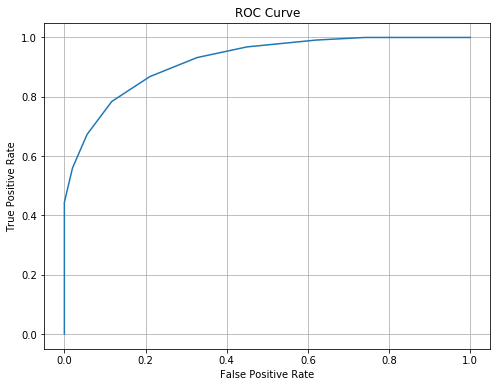

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In pratica, ogni valore della threshold definisce un classificatore che effettua un **compromesso** tra **TPR** e **FPR**. Per valori molto alti della soglia, riusciamo a massimizzare il **TPR** ottenendo un **FPR** alto (il che non è desiderabile). Per valori molto bassi della soglia, riusciamo a minimizzare il **FPR** ma otteniamo un **TPR** molto basso (anche in questo caso non desiderabile).

In generale, la curva **ROC** ci permette di osservare le performance di un classificatore **indipendentemente dal valore della soglia utilizzato**. Idealmente, vorremmo che la nostra curva includesse il punto di coordinate (0,1), ovvero vorremmo che esistesse almeno una soglia per la quale otteniamo **TPR** pari a 1 e **FPR** pari a 0. Analogamente, vorremmo che la curva si trovasse sempre al di sopra dalla diagonale principale, sulla quale un incremento di **TPR** non corrisponderebbe a un decremento di **FPR**. Vediamo di plottare due prototipi della **curva ideale** e della **curva pessima**:

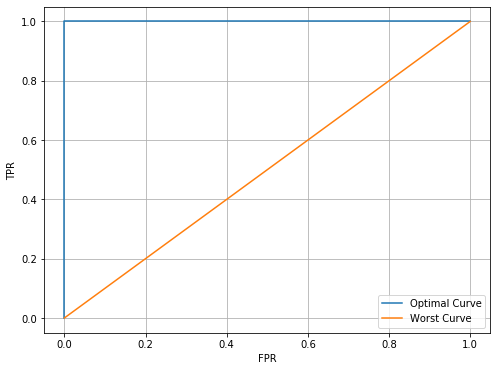

In [40]:
fpr_best = np.linspace(0,1,100)
tpr_best = np.ones(100)

plt.figure(figsize=(8,6))
plt.plot([0]+list(fpr_best),[0]+list(tpr_best))
plt.plot(fpr_best,fpr_best)

plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(['Optimal Curve','Worst Curve'])
plt.show()

Più la nostra curva "somiglia" alla curva ottima, migliore è il classificatore. Quando il classificatore prevede le classi in maniera totalmente casuale, otteniamo la curva pessima.

Abbiamo detto che le curve ROC sono buone per valutare la bontà di un classificatore indipendentemente dalla soglia usata per classificare. In particolare, le curve ROC possono essere usate per confrontare più classificatori. Supponiamo di costruire un classificatore analogo basato sulle misure dei pesi. Confrontiamo le due curve ROC:

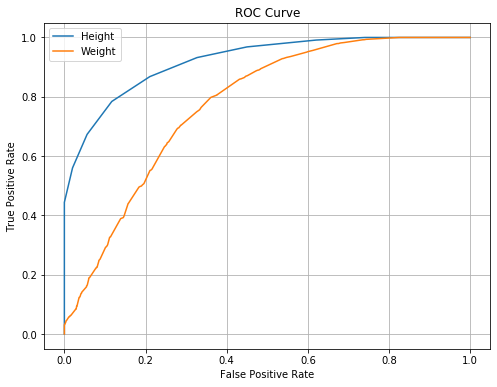

In [41]:
def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr)
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
fpr_h,tpr_h,t_h=roc_curve(data.sex=='M', data.height)
fpr_w,tpr_w,t_w=roc_curve(data.sex=='M', data.weight)

plt.figure(figsize=(8,6))
plot_roc(fpr_h,tpr_h)
plot_roc(fpr_w,tpr_w)
plt.legend(['Height','Weight'])
plt.grid()
plt.show()

Resta ancora da capire come scegliere una buona soglia per il classificatore. Abbiamo detto che la soglia va scelta sulla base di un qualche criterio legato all'applicazione in cui utilizzeremo il classificatore. Supponiamo di voler trovare la soglia che massimizzi **TPR** e minimizzi **FPR** e supponiamo che i due score abbiano lo stesso peso nella nostra applicazione. Possiamo dunque scegliere la soglia che massimizza la somma **TPR+(1-FPR)**. Vediamo come questo valore cambia al cambiare delle soglie:

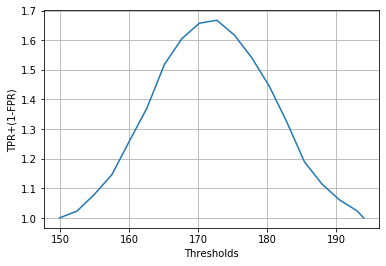

In [42]:
score = tpr_h+1-fpr_h
plt.plot(t_h,score)
plt.xlabel('Thresholds')
plt.ylabel('TPR+(1-FPR)')
plt.grid()
plt.show()

Possiamo osservare che esiste un massimo globale. Troviamo la soglia in corrispondenza della quale si ha tale massimo:

In [43]:
optimal_threshold = t_h[np.argmax(score)]
print("La soglia migliore è %0.2f" % optimal_threshold)

La soglia migliore è 172.72


Calcoliamo dunque TPR e FPR per il classificatore individuato da questa soglia:

In [44]:
preds = classify(data,optimal_threshold)
cm = confusion_matrix(male_gt, preds)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))

False Positive Rate: 0.12
True Positive Rate: 0.78


## - Valutazione degli errori di un classificatore e curve ROC - FINE 